## Capstone Project - The Battle of Neighbourhoods

### Introduction

Kolkata is on of the metro cities of India. Once it was the capital of India. The city has a population of 1.49 crores.

The language of Kolkata and the one that is most widely spoken is Bangla. However, English and hindi are also spoken as a formal language within businesses and government agencies.

With it’s diverse culture , comes diverse food items. There are many restaurants in Kolkata, each belonging to different categories like Chinese, Italian, North Indian, South Indian etc. So as a part of this project, we will list and visualise all major parts of Kolkata.

### Questions that can be asked using the above mentioned datasets

1) What is best location in Kolkata for Chinese Cuisine?

2) Which areas have large number of Chinese Resturant Market?

3) Which all areas have less number of resturant?

4) Which is the best place to stay if I prefer Chinese Cuisine?

5) What places are have best restaurant in Kolkata?

### Data

Kolkata restaurant data from Kaggle Zomato dataset
Nearby locality information of locations obtained using Foursquare API

In [3]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import geocoder

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
india = df[df['Country Code'] == 1]
kolkata = india[india['City'] == 'Kolkata']
kolkata.reset_index(drop=True, inplace=True)
kolkata.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18217475,Asia Kitchen by Mainland China,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata",88.393294,22.514688,"Asian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.6,Dark Green,Excellent,945
1,18249144,Hoppipola,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,1103
2,18017612,Spice Kraft,1,Kolkata,"54/1/2A, Hazra Road, Ballygunge Phari, Near Ha...",Ballygunge,"Ballygunge, Kolkata",88.364453,22.526461,"Continental, Middle Eastern, Asian",...,Indian Rupees(Rs.),No,No,No,No,3,4.8,Dark Green,Excellent,1424
3,18377112,Nawwarah,1,Kolkata,"48A, Syed Amir Ali Avenue, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,326
4,20002,6 Ballygunge Place,1,Kolkata,"6, Ballygunge Place, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",88.368628,22.527893,Bengali,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.4,Green,Very Good,1778


In [8]:
Res = kolkata[kolkata.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [9]:
Res = Res[Res['Aggregate rating'] !=0.0]
Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Asia Kitchen by Mainland China,"Acropolis Mall, Kasba",88.393294,22.514688,"Asian, Chinese",4.6,Excellent,945
1,Hoppipola,"Acropolis Mall, Kasba",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",4.2,Very Good,1103
2,Spice Kraft,Ballygunge,88.364453,22.526461,"Continental, Middle Eastern, Asian",4.8,Excellent,1424
3,Nawwarah,Ballygunge,88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",3.9,Good,326
4,6 Ballygunge Place,Ballygunge,88.368628,22.527893,Bengali,4.4,Very Good,1778


In [10]:
Kolkata_Rest = folium.Map(location=[22.50, 88.41], zoom_start=12)
X = Res['Latitude']
Y = Res['Longitude']
Z = np.stack((X, Y), axis=1)
kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
Res['Cluster'] = clusters
for latitude, longitude, Locality, cluster in zip(Res['Latitude'], Res['Longitude'], Res['Locality'], Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Kolkata_Rest)
Kolkata_Rest

In [11]:
Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Asia Kitchen by Mainland China,"Acropolis Mall, Kasba",88.393294,22.514688,"Asian, Chinese",4.6,Excellent,945,2
1,Hoppipola,"Acropolis Mall, Kasba",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",4.2,Very Good,1103,2
2,Spice Kraft,Ballygunge,88.364453,22.526461,"Continental, Middle Eastern, Asian",4.8,Excellent,1424,3
3,Nawwarah,Ballygunge,88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",3.9,Good,326,3
4,6 Ballygunge Place,Ballygunge,88.368628,22.527893,Bengali,4.4,Very Good,1778,3


## Question 1 : What places have the best restaurants in Kolkata?

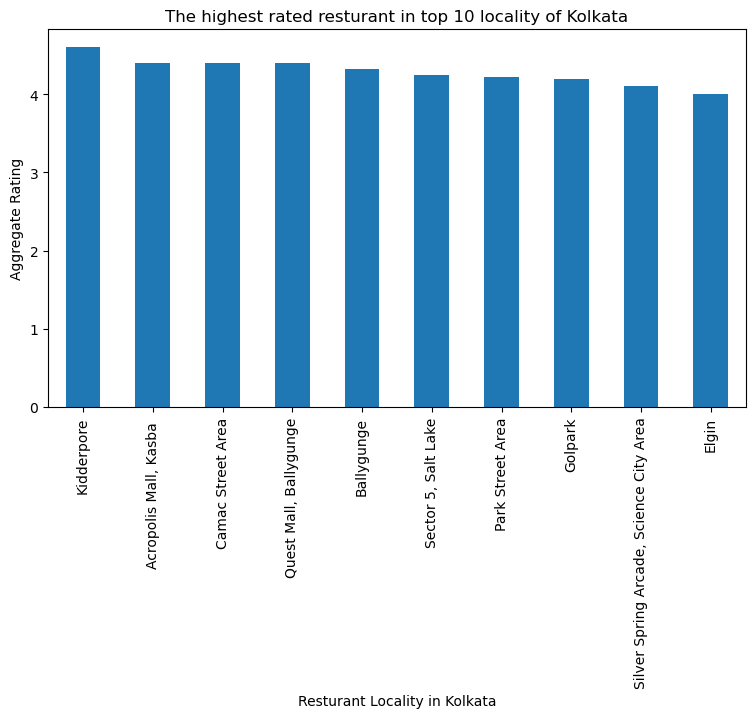

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
plt.title('The highest rated resturant in top 10 locality of Kolkata')
Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')
plt.xlabel('Resturant Locality in Kolkata')
plt.ylabel('Aggregate Rating')
plt.show()

The best restarants are available in Kidderpore area.

## Question 2 : Which place have the worst restaurants in Kolkata?

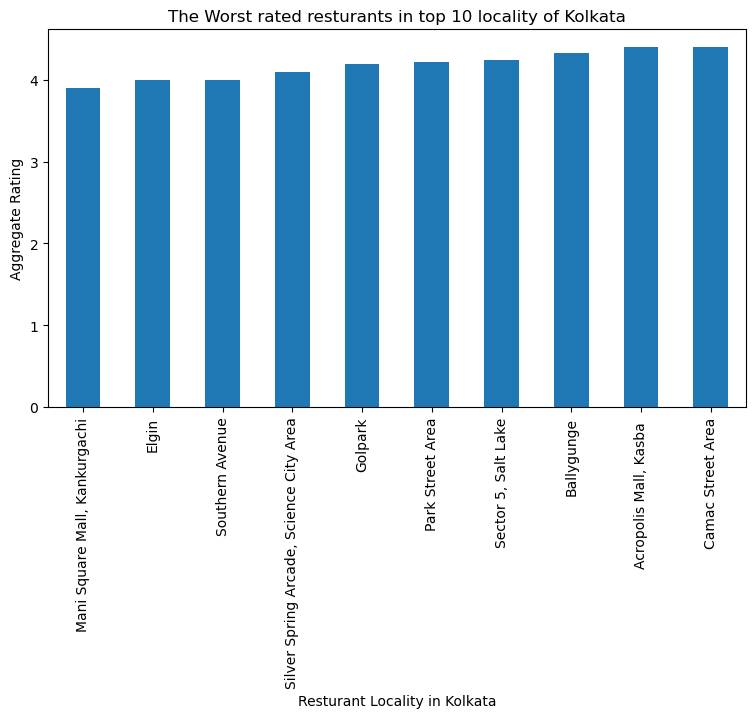

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
plt.title('The Worst rated resturants in top 10 locality of Kolkata')
Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')
plt.xlabel('Resturant Locality in Kolkata')
plt.ylabel('Aggregate Rating')
plt.show()

The worst restaurants are located at Mani Square Mall, Kankurgachi

## Question 3 : Which place have most number of restaurants?

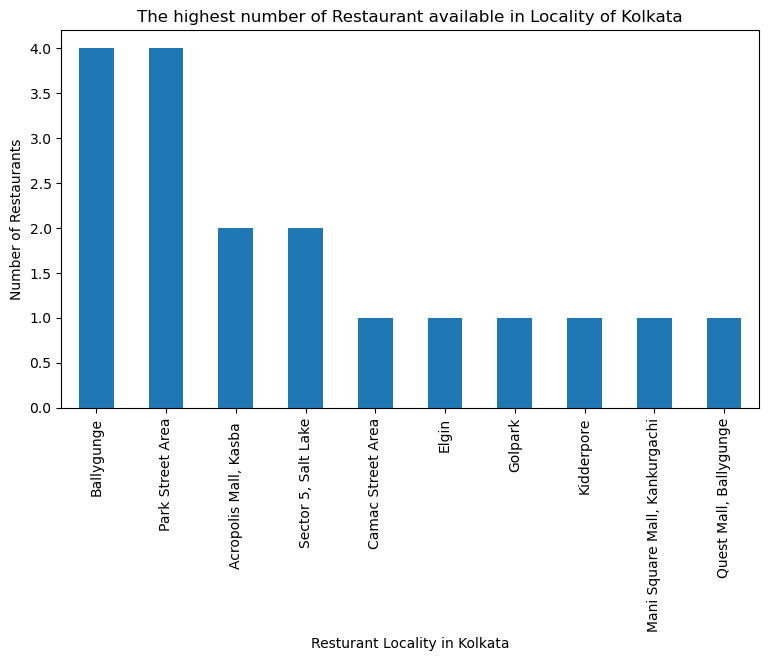

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
plt.title('The highest number of Restaurant available in Locality of Kolkata')
Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')
plt.xlabel('Resturant Locality in Kolkata')
plt.ylabel('Number of Restaurants')
plt.show()

So, Ballygunge has highest number of restaurants in Kolkata.

## Question 4 : Which place have less number of restaurants?

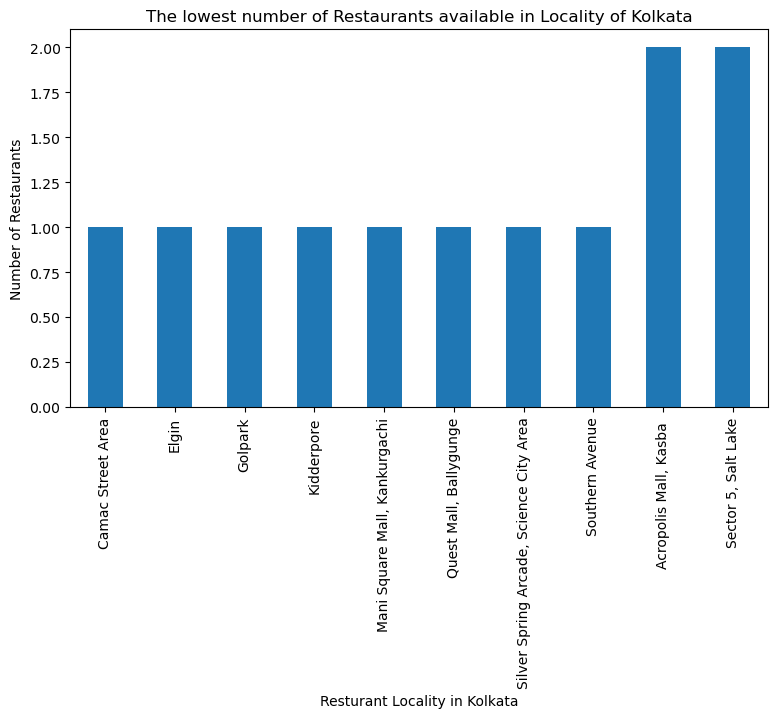

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
plt.title('The lowest number of Restaurants available in Locality of Kolkata')
Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')
plt.xlabel('Resturant Locality in Kolkata')
plt.ylabel('Number of Restaurants')
plt.show()

So, Camac Street Area has the lowest number of restaurants in Kolkata.

## Question 5 : What is the best place for chinese food in Kolkata?

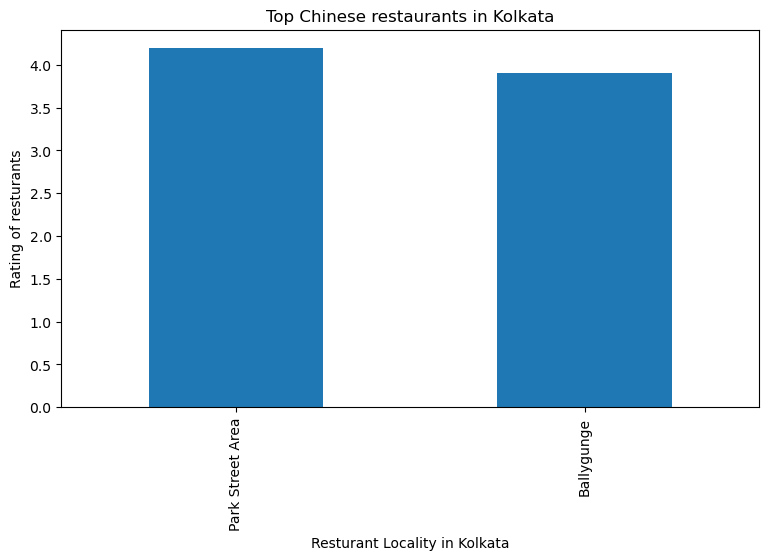

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Top Chinese restaurants in Kolkata')
Res[Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')
plt.xlabel('Resturant Locality in Kolkata')
plt.ylabel('Rating of resturants')
plt.show()

So, Ballygunge is the best place in Kolkata for Chinese food.

## Data transformation

In [18]:
df_Res_Loc =  Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [19]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Acropolis Mall, Kasba",22.514636,88.393302,2,"Asian, Chinese, Italian, Mexican, American, Me...",4.400,"Excellent, Very Good",2048
1,Ballygunge,22.531687,88.366044,4,"Continental, Middle Eastern, Asian, Chinese, C...",4.325,"Excellent, Good, Very Good",4232
2,Camac Street Area,22.547186,88.350680,1,"North Indian, Chinese, Mexican, Italian",4.400,Very Good,1484
3,Elgin,22.537960,88.349843,1,"Tex-Mex, American",4.000,Very Good,911
4,Golpark,22.515082,88.367830,1,"Seafood, Chinese",4.200,Very Good,2584


In [21]:
CLIENT_ID = 'JDLUI3UDZNX2IQYQEM1CCIOZKV5YQDVPCG55CLUJJKM5BMZ0'
CLIENT_SECRET = 'AEK4VKJ3V5UO3ZET1YT3ETETF2UXYAKQ1A5SS4VQHZ5H2P0Y'
VERSION = '20180605'

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [23]:
kolkata_venues = getNearbyVenues(names=df_final['Locality'], latitudes=df_final['Lat'], longitudes=df_final['Lng'])

Acropolis Mall, Kasba 
Ballygunge
Camac Street Area
Elgin
Golpark
Kidderpore
Mani Square Mall, Kankurgachi
Park Street Area
Quest Mall, Ballygunge
Sector 5, Salt Lake
Silver Spring Arcade, Science City Area
Southern Avenue


In [24]:
kolkata_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Acropolis Mall, Kasba",22.514636,88.393302,Acropolis Mall,22.514823,88.393235,Shopping Mall
1,"Acropolis Mall, Kasba",22.514636,88.393302,Cinépolis,22.514824,88.393236,Multiplex
2,"Acropolis Mall, Kasba",22.514636,88.393302,Punjabee Rasoi,22.515974,88.392545,Dhaba
3,"Acropolis Mall, Kasba",22.514636,88.393302,Naushijaan Restaurant - Lazzat e Lucknow,22.515238,88.389958,Awadhi Restaurant
4,"Acropolis Mall, Kasba",22.514636,88.393302,Starbucks,22.514775,88.393169,Coffee Shop


In [25]:
kolkata_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Acropolis Mall, Kasba",11,11,11,11,11,11
Ballygunge,10,10,10,10,10,10
Camac Street Area,24,24,24,24,24,24
Elgin,20,20,20,20,20,20
Golpark,5,5,5,5,5,5
Kidderpore,5,5,5,5,5,5
"Mani Square Mall, Kankurgachi",15,15,15,15,15,15
Park Street Area,43,43,43,43,43,43
"Quest Mall, Ballygunge",17,17,17,17,17,17


In [26]:
kolkata_onehot = pd.get_dummies(kolkata_venues[['Venue Category']], prefix="", prefix_sep="")
kolkata_onehot['Locality'] = kolkata_venues['Locality'] 
column_list = kolkata_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
kolkata_onehot = kolkata_onehot[column_list]
kolkata_onehot.head()

,Locality,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,Bookstore,...,Shopping Mall,Snack Place,South Indian Restaurant,Sports Club,Steakhouse,Tea Room,Tex-Mex Restaurant,Theme Restaurant,Tram Station,Vegetarian / Vegan Restaurant
0,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Acropolis Mall, Kasba",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
kolkata_grouped = kolkata_onehot.groupby('Locality').mean().reset_index()
kolkata_grouped

,Locality,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,Bookstore,...,Shopping Mall,Snack Place,South Indian Restaurant,Sports Club,Steakhouse,Tea Room,Tex-Mex Restaurant,Theme Restaurant,Tram Station,Vegetarian / Vegan Restaurant
0,"Acropolis Mall, Kasba",0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Ballygunge,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.100000
2,Camac Street Area,0.0,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.041667,0.0,0.000000,0.041667,0.000000,0.000000,0.0,0.000000
3,Elgin,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.050000,0.000000,0.000000,0.0,0.000000,0.050000,0.000000,0.000000,0.0,0.000000
4,Golpark,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Kidderpore,0.0,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.2,0.000000
6,"Mani Square Mall, Kankurgachi",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.066667,0.0,0.066667
7,Park Street Area,0.0,0.000000,0.023256,0.000000,0.046512,0.023256,0.000000,0.000000,0.023256,...,0.023256,0.023256,0.000000,0.0,0.023256,0.023256,0.000000,0.000000,0.0,0.000000
8,"Quest Mall, Ballygunge",0.0,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.058824,0.000000,0.000000,0.0,0.000000,0.000000,0.058824,0.000000,0.0,0.000000
9,"Sector 5, Salt Lake",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [28]:
num_top_venues = 5
for hood in kolkata_grouped['Locality']:
    print("----"+hood+"----")
    temp = kolkata_grouped[kolkata_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acropolis Mall, Kasba ----
                 venue  freq
0                Dhaba  0.09
1                Hotel  0.09
2  Fried Chicken Joint  0.09
3     Department Store  0.09
4          Coffee Shop  0.09


----Ballygunge----
                           venue  freq
0                         Bakery   0.2
1  Vegetarian / Vegan Restaurant   0.1
2                    Sports Club   0.1
3              Indian Sweet Shop   0.1
4                     Hookah Bar   0.1


----Camac Street Area----
                venue  freq
0                Café  0.12
1       Shopping Mall  0.12
2  Italian Restaurant  0.08
3  Mexican Restaurant  0.08
4           Nightclub  0.08


----Elgin----
                 venue  freq
0                 Café  0.15
1  American Restaurant  0.10
2   Bengali Restaurant  0.10
3            Nightclub  0.10
4     Department Store  0.05


----Golpark----
                venue  freq
0               Plaza   0.2
1  Mughlai Restaurant   0.2
2  Chinese Restaurant   0.2
3  Bengali Restaurant   

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = kolkata_grouped['Locality']
for ind in np.arange(kolkata_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kolkata_grouped.iloc[ind, :], num_top_venues)
Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kasba",Chinese Restaurant,Fried Chicken Joint,Dhaba,Indian Sweet Shop,Multiplex,Restaurant,Department Store,Shopping Mall,Awadhi Restaurant,Hotel
1,Ballygunge,Bakery,Vegetarian / Vegan Restaurant,Sports Club,Pizza Place,Indian Sweet Shop,Plaza,Bengali Restaurant,Hookah Bar,Dhaba,Gastropub
2,Camac Street Area,Café,Shopping Mall,Mexican Restaurant,Nightclub,Hotel,Italian Restaurant,Indian Restaurant,Planetarium,Gastropub,Dhaba
3,Elgin,Café,American Restaurant,Bengali Restaurant,Nightclub,Restaurant,Department Store,Fast Food Restaurant,Food Court,Hotel,Multiplex
4,Golpark,Bengali Restaurant,Mughlai Restaurant,Plaza,Chinese Restaurant,Café,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Department Store
5,Kidderpore,Market,Tram Station,Awadhi Restaurant,Pharmacy,Vegetarian / Vegan Restaurant,Department Store,IT Services,Hotel,Hookah Bar,Gastropub
6,"Mani Square Mall, Kankurgachi",Fast Food Restaurant,Café,Vegetarian / Vegan Restaurant,Bowling Alley,Fried Chicken Joint,Mediterranean Restaurant,Food Court,Multiplex,Department Store,Indian Restaurant
7,Park Street Area,Café,Hotel,Chinese Restaurant,Nightclub,Indian Restaurant,Pub,Pizza Place,Fast Food Restaurant,BBQ Joint,Restaurant
8,"Quest Mall, Ballygunge",Indian Restaurant,Café,Indian Sweet Shop,Irish Pub,Hotel,Hookah Bar,Mughlai Restaurant,Multiplex,Department Store,Coffee Shop
9,"Sector 5, Salt Lake",Café,Indian Restaurant,Multiplex,Pizza Place,Hookah Bar,Fried Chicken Joint,Fast Food Restaurant,Falafel Restaurant,Mughlai Restaurant,Dhaba


In [33]:
kclusters = 5
kolkata_clustering = kolkata_grouped.drop('Locality', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kolkata_clustering)
kmeans.labels_[0:10]
kmeans.labels_.shape

(12,)

In [34]:
kolkata_merged = df_final.head(240)
kolkata_merged['Cluster Labels'] = kmeans.labels_
kolkata_merged = kolkata_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')
kolkata_merged.head()

<ipython-input-34-54624117c5a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolkata_merged['Cluster Labels'] = kmeans.labels_


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kasba",22.514636,88.393302,2,"Asian, Chinese, Italian, Mexican, American, Me...",4.400,"Excellent, Very Good",2048,0,Chinese Restaurant,Fried Chicken Joint,Dhaba,Indian Sweet Shop,Multiplex,Restaurant,Department Store,Shopping Mall,Awadhi Restaurant,Hotel
1,Ballygunge,22.531687,88.366044,4,"Continental, Middle Eastern, Asian, Chinese, C...",4.325,"Excellent, Good, Very Good",4232,0,Bakery,Vegetarian / Vegan Restaurant,Sports Club,Pizza Place,Indian Sweet Shop,Plaza,Bengali Restaurant,Hookah Bar,Dhaba,Gastropub
2,Camac Street Area,22.547186,88.350680,1,"North Indian, Chinese, Mexican, Italian",4.400,Very Good,1484,0,Café,Shopping Mall,Mexican Restaurant,Nightclub,Hotel,Italian Restaurant,Indian Restaurant,Planetarium,Gastropub,Dhaba
3,Elgin,22.537960,88.349843,1,"Tex-Mex, American",4.000,Very Good,911,0,Café,American Restaurant,Bengali Restaurant,Nightclub,Restaurant,Department Store,Fast Food Restaurant,Food Court,Hotel,Multiplex
4,Golpark,22.515082,88.367830,1,"Seafood, Chinese",4.200,Very Good,2584,2,Bengali Restaurant,Mughlai Restaurant,Plaza,Chinese Restaurant,Café,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Department Store


In [35]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors = ['red', 'green', 'blue', 'yellow','orange']
markers_colors = []
for lat, lon, poi, cluster in zip(kolkata_merged['Lat'], kolkata_merged['Lng'], kolkata_merged['Locality'], kolkata_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)  
map_clusters

In [36]:
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 0, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22.514636,4.400,"Excellent, Very Good",2048,0,Chinese Restaurant,Fried Chicken Joint,Dhaba,Indian Sweet Shop,Multiplex,Restaurant,Department Store,Shopping Mall,Awadhi Restaurant,Hotel
1,22.531687,4.325,"Excellent, Good, Very Good",4232,0,Bakery,Vegetarian / Vegan Restaurant,Sports Club,Pizza Place,Indian Sweet Shop,Plaza,Bengali Restaurant,Hookah Bar,Dhaba,Gastropub
2,22.547186,4.400,Very Good,1484,0,Café,Shopping Mall,Mexican Restaurant,Nightclub,Hotel,Italian Restaurant,Indian Restaurant,Planetarium,Gastropub,Dhaba
3,22.537960,4.000,Very Good,911,0,Café,American Restaurant,Bengali Restaurant,Nightclub,Restaurant,Department Store,Fast Food Restaurant,Food Court,Hotel,Multiplex
6,22.577821,3.900,Good,1064,0,Fast Food Restaurant,Café,Vegetarian / Vegan Restaurant,Bowling Alley,Fried Chicken Joint,Mediterranean Restaurant,Food Court,Multiplex,Department Store,Indian Restaurant
7,22.552495,4.225,"Excellent, Good, Very Good",19079,0,Café,Hotel,Chinese Restaurant,Nightclub,Indian Restaurant,Pub,Pizza Place,Fast Food Restaurant,BBQ Joint,Restaurant
8,22.539129,4.400,Very Good,2224,0,Indian Restaurant,Café,Indian Sweet Shop,Irish Pub,Hotel,Hookah Bar,Mughlai Restaurant,Multiplex,Department Store,Coffee Shop
9,22.569363,4.250,"Excellent, Good",7006,0,Café,Indian Restaurant,Multiplex,Pizza Place,Hookah Bar,Fried Chicken Joint,Fast Food Restaurant,Falafel Restaurant,Mughlai Restaurant,Dhaba


In [37]:
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 1, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,22.538999,4.6,Excellent,1219,1,Market,Tram Station,Awadhi Restaurant,Pharmacy,Vegetarian / Vegan Restaurant,Department Store,IT Services,Hotel,Hookah Bar,Gastropub


In [38]:
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 2, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,22.515082,4.2,Very Good,2584,2,Bengali Restaurant,Mughlai Restaurant,Plaza,Chinese Restaurant,Café,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Department Store


In [39]:
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 3, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,22.514119,4.0,Very Good,1126,3,Café,Boutique,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Coffee Shop,Plaza,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,Food Court


In [40]:
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 4, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,22.5491,4.1,Very Good,1616,4,Hotel,Indian Restaurant,Asian Restaurant,Bengali Restaurant,Multicuisine Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dhaba,IT Services,Hookah Bar


## Conclusion

The best restarants are available in Kidderpore area.
The worst restaurants are located at Mani Square Mall, Kankurgachi
Ballygunge has highest number of restaurants in Kolkata.
Camac Street Area has the lowest number of restaurants in Kolkata.
Ballygunge is the best place in Kolkata for Chinese food.